In [124]:
import copy
import json
import os
import numpy as np
import kernel
import configuration
import calibration
from matplotlib import pyplot as plt

In [135]:
def float_to_str(nr: float):
    nr = float(nr)
    return str(nr).replace('.', '')

def min_sigma_of_axis(data, axis):
    return data[np.where(data[:, axis] == np.nanmin(data[:, axis]))][0]

def make_header(path, data, case):
    print(f'Minimize values in {case} from:')
    print(path)
    print(f'{"sigma":10}|{"mean force":10}|{"var force":10}|{"mean cos":10}|{"var cos":10}|{"energy":10}|')
    for i in (1, 5): #range(1, 6):
        line = ""
        for val in min_sigma_of_axis(data, i):
            line += f'{val:10.6f}|'
        print(line)    
    
def plot4(data: np.array, max_n, title=""):
    fig, axs = plt.subplots(1, 3, figsize = (18, 6))
    fig.suptitle(title, fontsize=20)
    titles = ["force mean", "force variance", "energy difference"]# "mean $cos$", "var $cos$", "energy difference"]
    
    indices = [1, 2, -1]
    for i, ax in enumerate(axs.flatten()):
        ax.scatter(data[:max_n, 0], data[:max_n, indices[i]])
        ax.grid()
        ax.set(xlabel="$\sigma$", title=titles[i])
        ax.set_yscale('log')
        #if i in (0, 1):
        #    ax.set_yscale('log')
        #if i == 4:
        #    break
            

def analyze(n: int, min_sigma, max_sigma, modi, stepsize, max_n=-1):
    print(f'{"steps":10}={n:5}')
    print(f'{"min sigma":10}={min_sigma:5}')
    print(f'{"max sigma":10}={max_sigma:5}')
    print(f'{"grid":10}={abs(min_sigma - max_sigma)/n:5}')
    print(f'{"configs":10}={1000 / stepsize:5}')
    print(f'{"modi":10}={modi:5}\n')
    
    fit_path = f'test_data/test_parameters/multi_config/fit_{n}_({float_to_str(min_sigma)}-{float_to_str(max_sigma)})_m{modi}_s{stepsize}.dat'
    fit = np.loadtxt(fit_path)
    make_header(fit_path, fit, 'fit')
    print("\n")

    pred_path = f'test_data/test_parameters/multi_config/prediction_{n}_({float_to_str(min_sigma)}-{float_to_str(max_sigma)})_m{modi}_s{stepsize}.dat'
    prediction = np.loadtxt(pred_path)
    make_header(pred_path, prediction, 'prediction')
        
    plot4(fit, max_n, "Fitting")
    plot4(prediction, max_n, "Prediction")

# Analyzing the influence of $\sigma$ in correspondence to nr of modi
## 10 modi

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  5.789478|  0.677208|  0.557823|  0.783552|  0.117351|  0.002719|
  0.000010|  1.016727|  0.243714|       nan|       nan|  0.000963|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  5.789478|  0.674639|  0.536804|  0.793131|  0.101553|  0.003043|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|


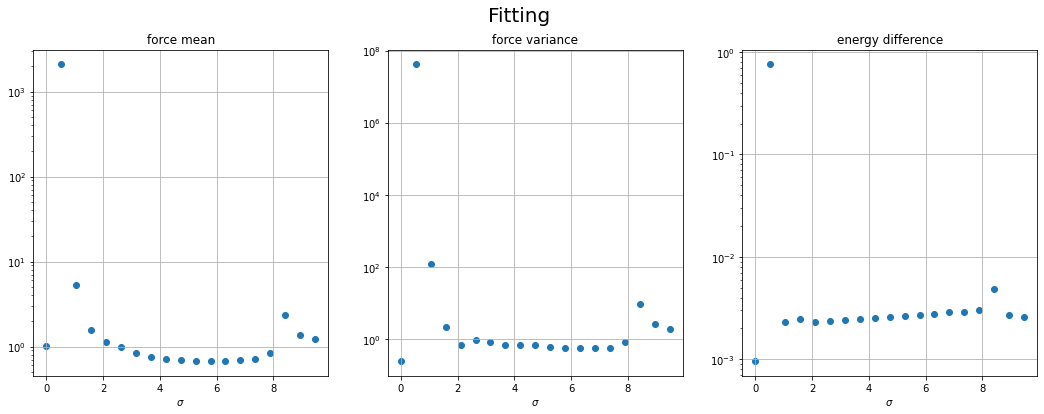

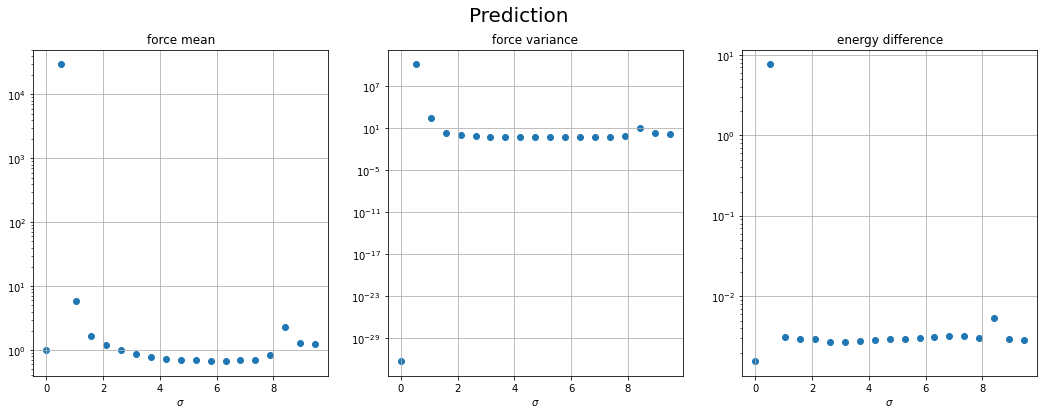

In [126]:
analyze(20, 0, 10, 10, 100)

steps     =   20
min sigma =    0
max sigma =    1
grid      = 0.05
configs   = 10.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-10)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.052641|  1.000000|  0.000000|       nan|       nan|  0.000963|
  0.105272|  1.000005|  0.000000|  0.034612|  0.321175|  0.000963|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-10)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|


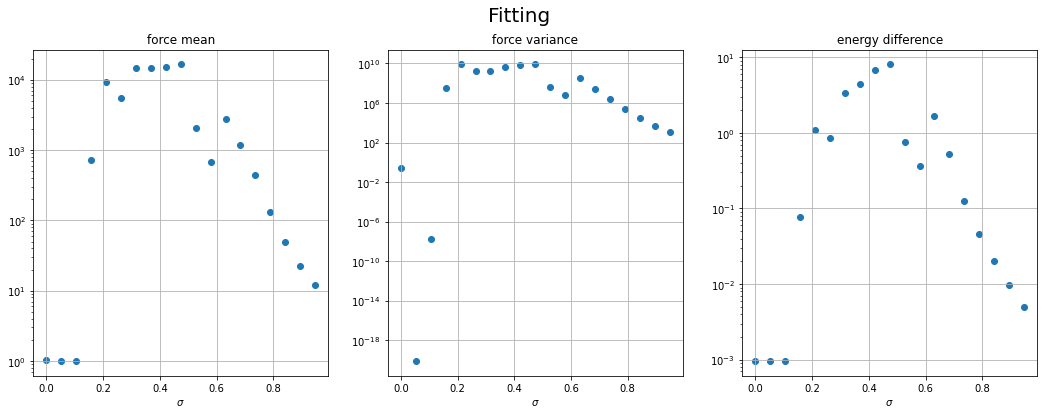

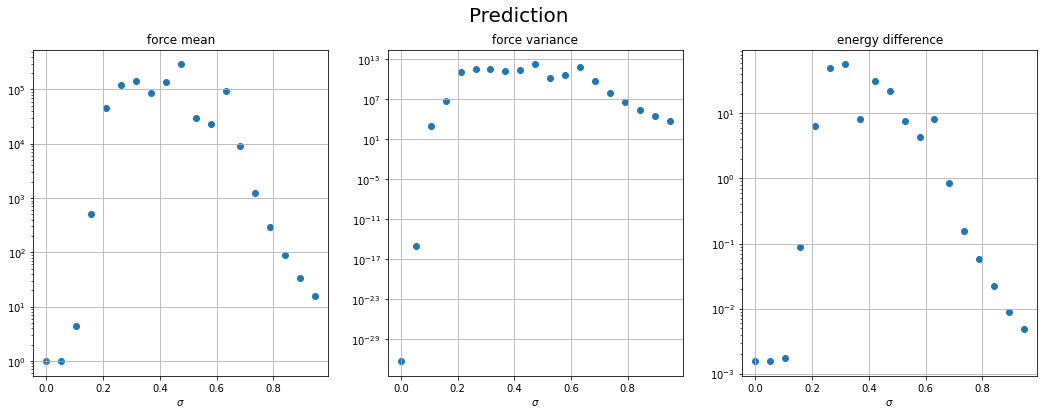

In [127]:
analyze(20, 0, 1, 10, 100)

## modi = 6

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =    6

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m6_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  8.947369|  0.485490|  0.444187|  0.863024|  0.062320|  0.002736|
  0.000010|  1.034026|  0.949059|       nan|       nan|  0.000963|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m6_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  8.947369|  0.469894|  0.145842|  0.870897|  0.055173|  0.003160|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|


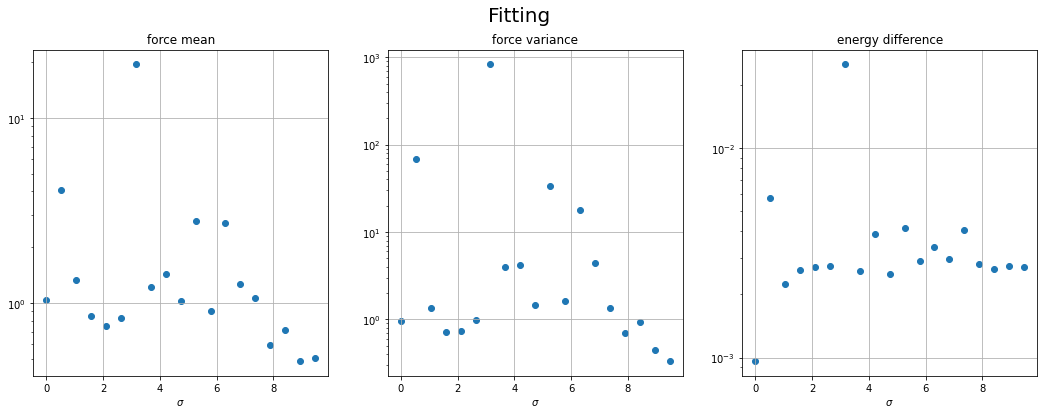

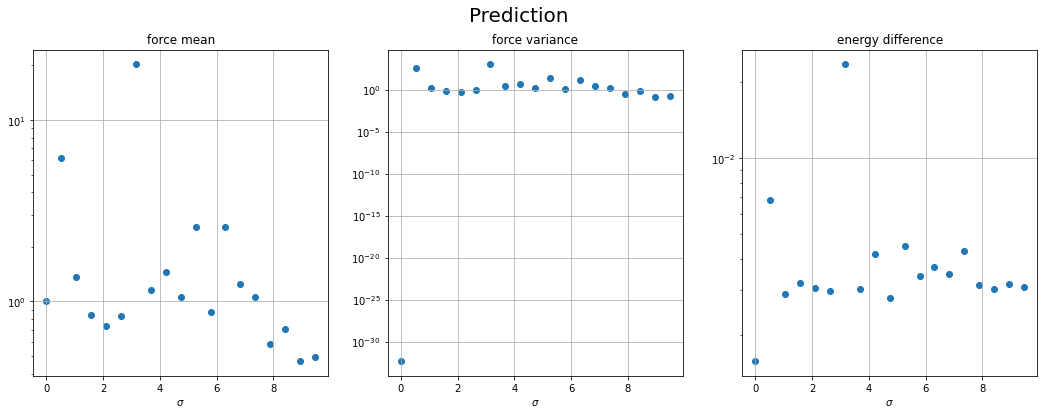

In [128]:
analyze(20, 0, 10, 6, 100)

## modi = 8

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m8_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 10.000000|  0.605132|  0.476746|  0.804968|  0.099436|  0.002764|
  0.000010|  1.020326|  0.319536|       nan|       nan|  0.000963|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m8_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 10.000000|  0.594563|  0.252479|  0.806364|  0.103115|  0.003093|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|


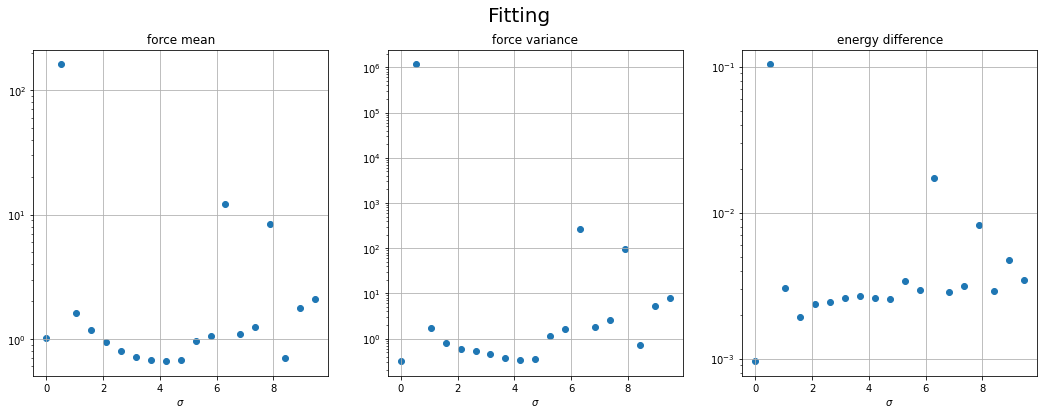

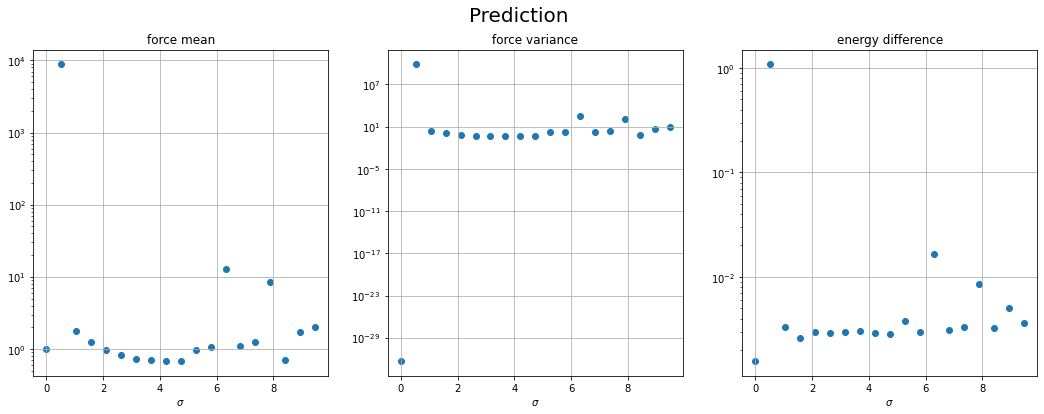

In [129]:
analyze(20, 0, 10, 8, 100)

## modi = 12

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =   12

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  8.421054|  0.633725|  0.476423|  0.790629|  0.102529|  0.002852|
  0.000010|  1.013812|  0.210202|       nan|       nan|  0.000963|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.894739|  0.632082|  0.367976|  0.790547|  0.099649|  0.003157|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|


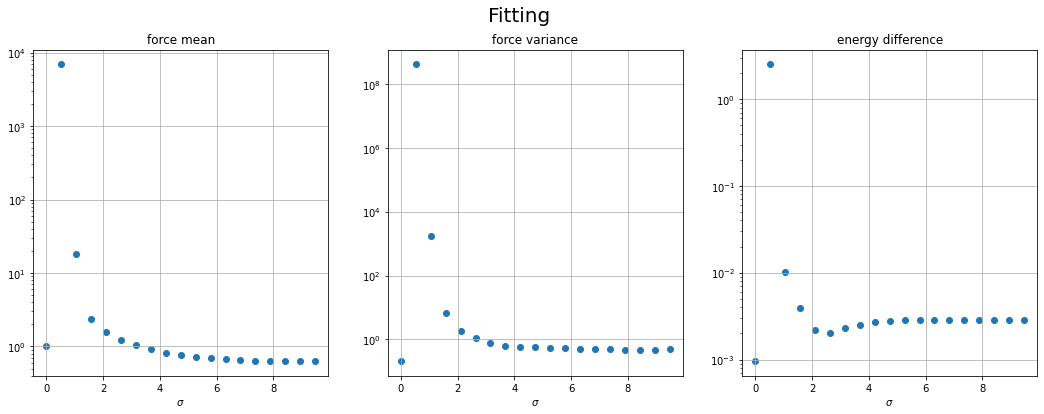

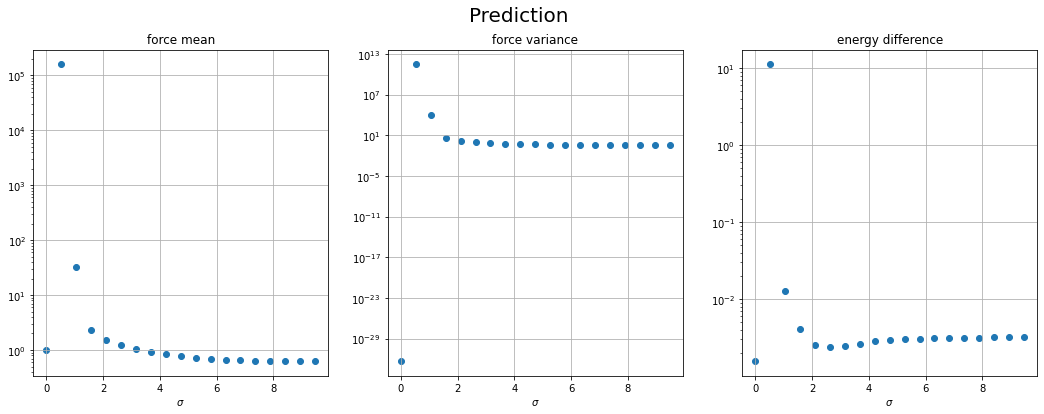

In [130]:
analyze(20, 0, 10, 12, 100)

## modi = 14

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =   12

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  8.421054|  0.633725|  0.476423|  0.790629|  0.102529|  0.002852|
  0.000010|  1.013812|  0.210202|       nan|       nan|  0.000963|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.894739|  0.632082|  0.367976|  0.790547|  0.099649|  0.003157|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001571|


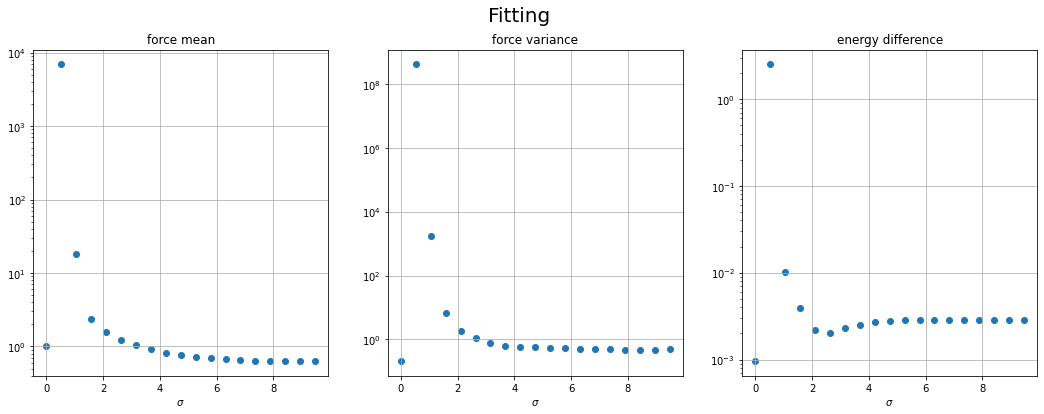

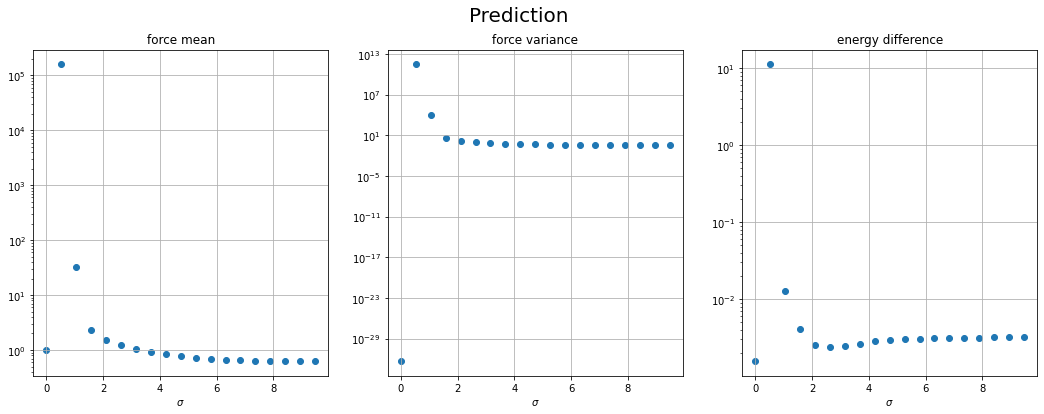

In [131]:
analyze(20, 0, 10, 12, 100)

# Analyzing the influence of the nr of configurations
## Learning on 20 configurations

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 20.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m10_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.736847|  0.660937|  0.542795|  0.771819|  0.122516|  0.001860|
  0.000010|  1.020142|  0.283197|       nan|       nan|  0.000824|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m10_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.736847|  0.651782|  0.322029|  0.781663|  0.117860|  0.001923|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001028|


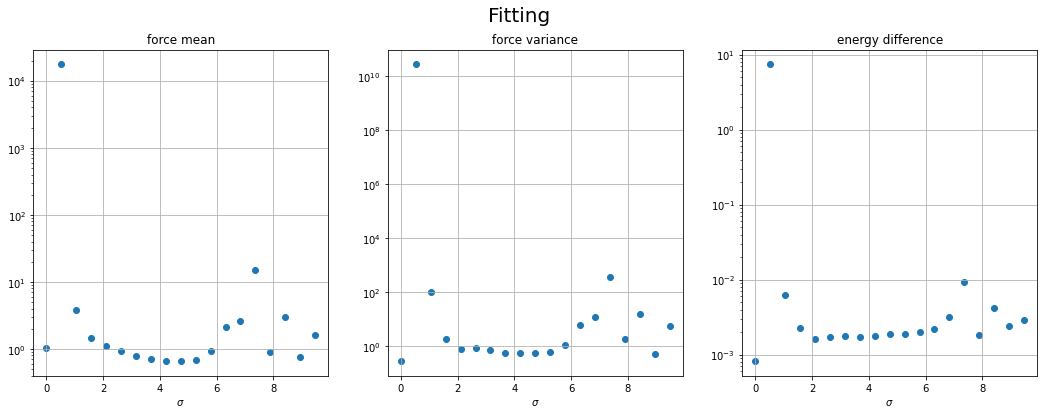

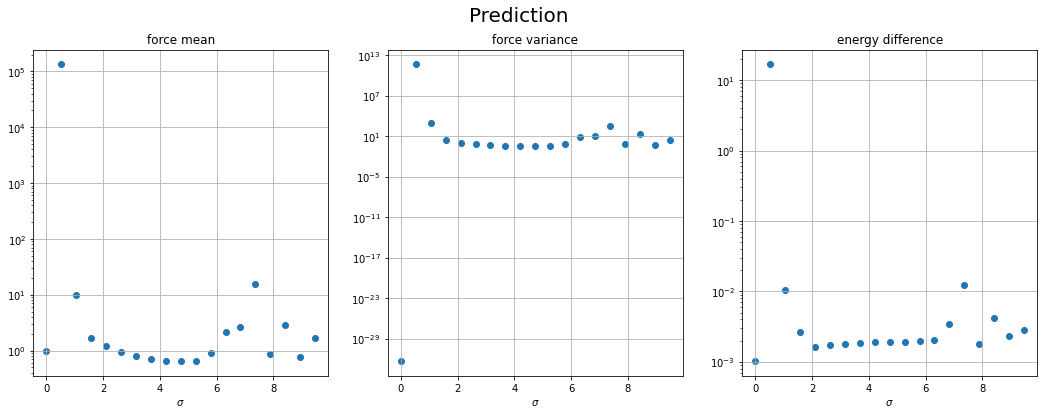

In [132]:
analyze(20, 0, 10, 10, 50)

steps     =   20
min sigma =    0
max sigma =   13
grid      = 0.65
configs   = 20.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-130)_m8_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 13.000000|  0.481250|  0.448517|  0.864938|  0.063210|  0.002055|
  0.000010|  1.017687|  0.357971|       nan|       nan|  0.000824|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-130)_m8_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 13.000000|  0.465383|  0.128239|  0.864851|  0.064766|  0.001929|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001028|


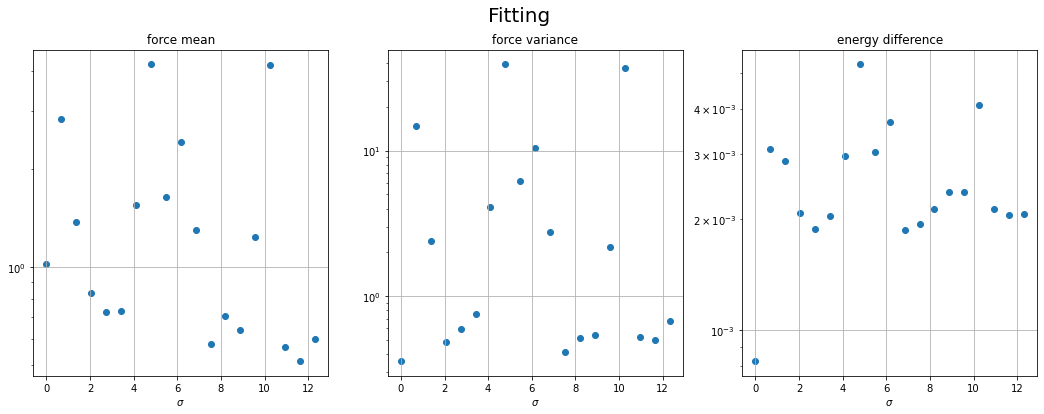

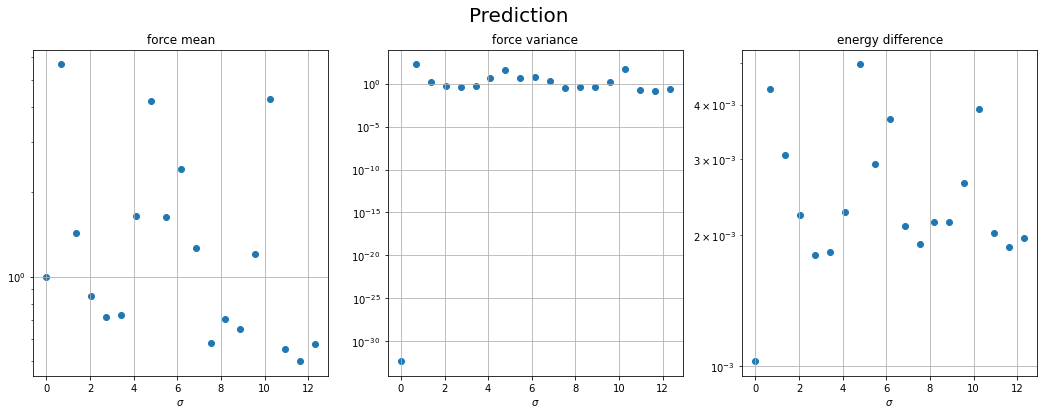

In [139]:
analyze(20, 0, 13, 8, 50)

steps     =    5
min sigma =   13
max sigma =   16
grid      =  0.6
configs   = 20.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_5_(130-160)_m8_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 16.000000|  0.473372|  0.396575|  0.868496|  0.060860|  0.002086|
 14.500000|  0.659749|  0.741774|  0.793037|  0.123466|  0.001852|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_5_(130-160)_m8_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 16.000000|  0.454040|  0.115912|  0.871297|  0.058750|  0.001937|
 15.250000|  0.484326|  0.131855|  0.854984|  0.069368|  0.001895|


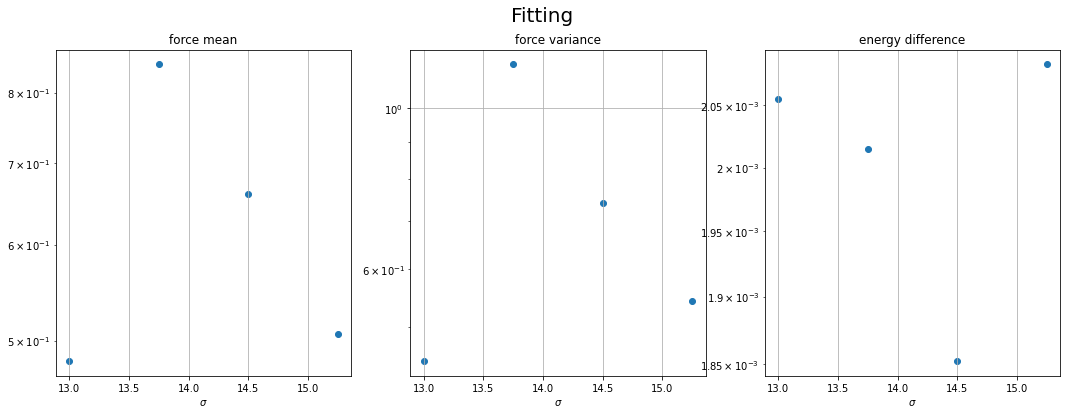

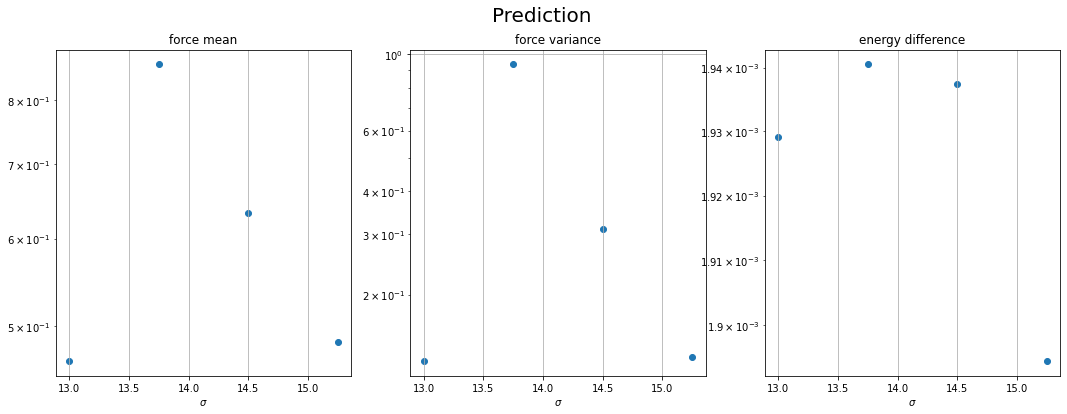

In [141]:
analyze(5, 13, 16, 8, 50)

steps     =   20
min sigma =   10
max sigma =   20
grid      =  0.5
configs   = 20.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(100-200)_m8_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 18.421053|  0.495425|  0.561256|  0.858480|  0.068255|  0.002058|
 11.052632|  0.948406|  3.187839|  0.697020|  0.169682|  0.001700|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(100-200)_m8_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 18.421053|  0.476282|  0.134917|  0.857528|  0.072548|  0.001905|
 12.631579|  0.926625|  1.241279|  0.693444|  0.176235|  0.001631|


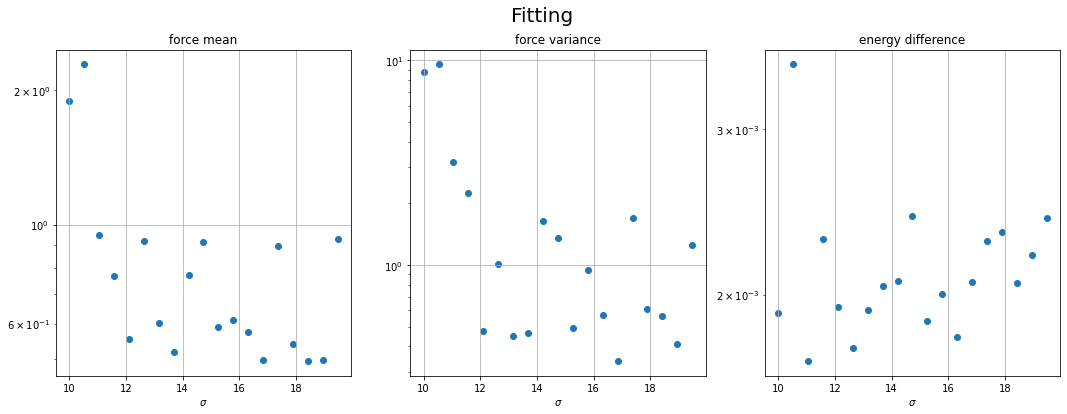

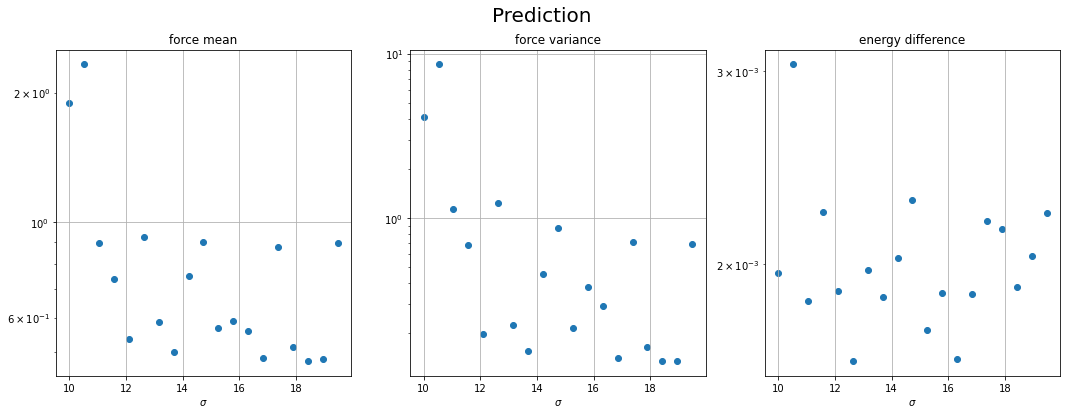

In [144]:
analyze(20, 10, 20, 8, 50)

## Learning on 40 configurations

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 40.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m10_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  3.684217|  0.645407|  0.542673|  0.790418|  0.104833|  0.004481|
  0.000010|  1.014824|  0.277211|       nan|       nan|  0.002128|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m10_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  3.684217|  0.669228|  0.475299|  0.782749|  0.114970|  0.004855|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002899|


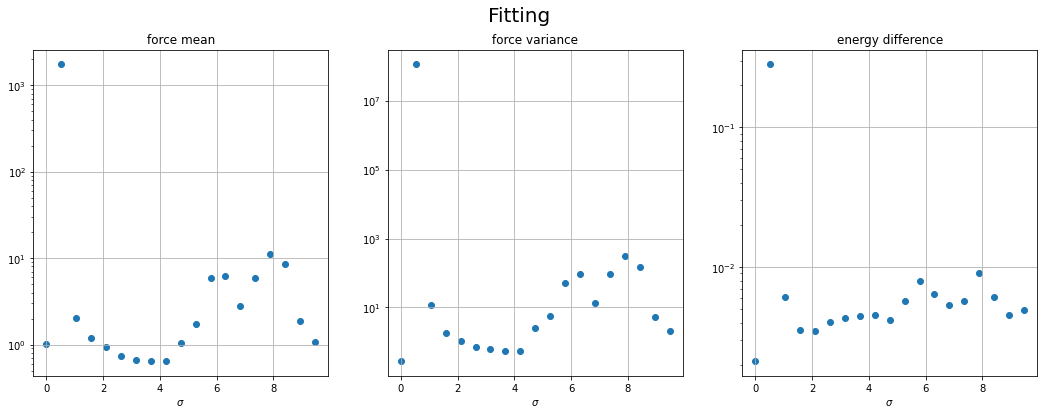

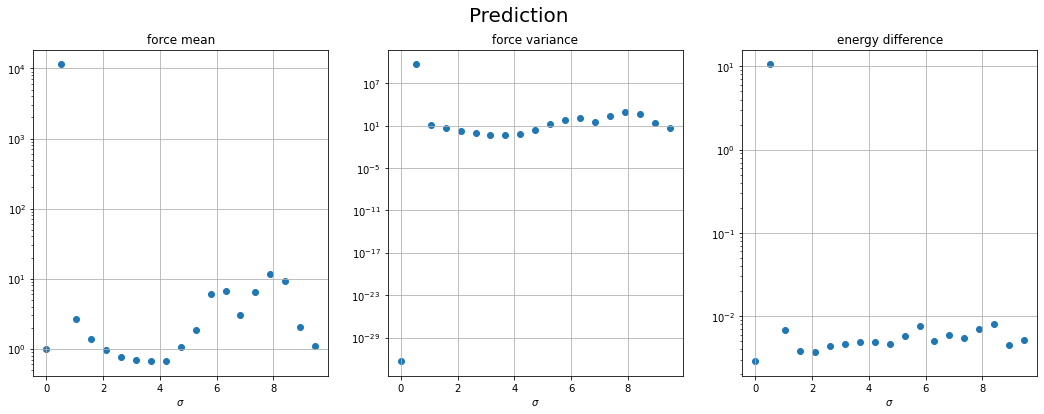

In [133]:
analyze(20, 0, 10, 10, 25)

steps     =   20
min sigma =    0
max sigma =   12
grid      =  0.6
configs   = 40.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-120)_m8_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 12.000000|  0.509820|  0.482714|  0.855015|  0.073591|  0.004612|
  0.000010|  1.009434|  0.338627|       nan|       nan|  0.002128|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-120)_m8_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 12.000000|  0.510407|  0.593033|  0.858008|  0.070913|  0.004834|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002899|


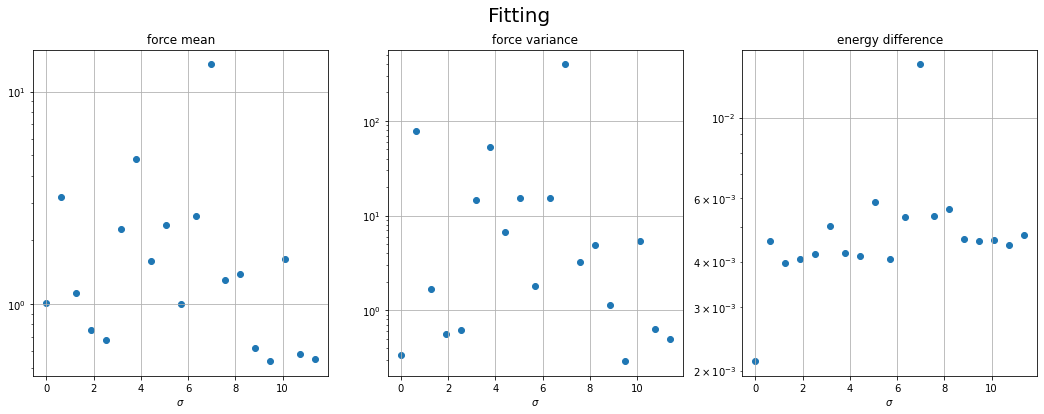

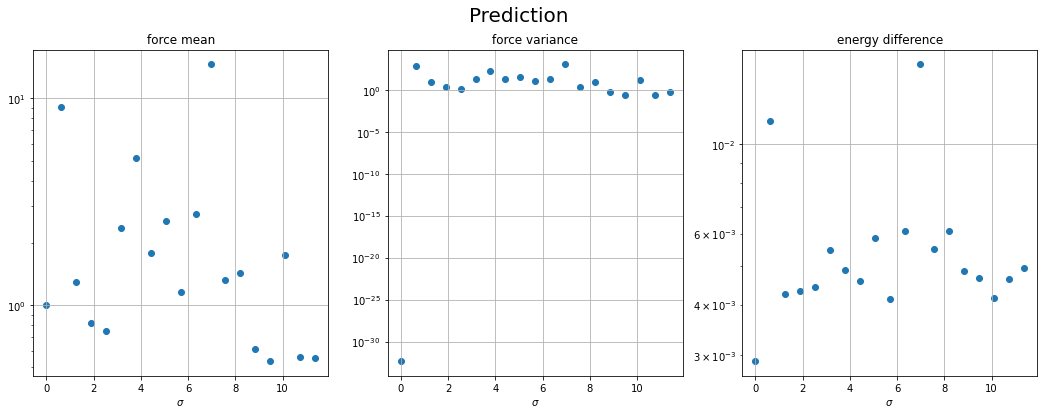

In [136]:
analyze(20, 0, 12, 8, 25)

steps     =    5
min sigma =   12
max sigma =   15
grid      =  0.6
configs   = 40.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_5_(120-150)_m8_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 12.000000|  0.509820|  0.482714|  0.855015|  0.073591|  0.004612|
 13.500000|  0.599798|  0.773917|  0.825384|  0.087904|  0.004488|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_5_(120-150)_m8_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 12.000000|  0.510407|  0.593033|  0.858008|  0.070913|  0.004834|
 13.500000|  0.612922|  1.120332|  0.824406|  0.087940|  0.004524|


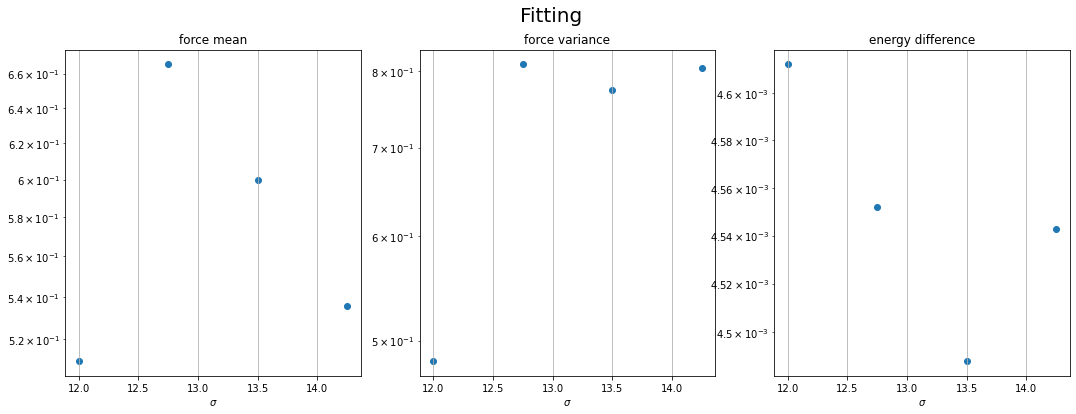

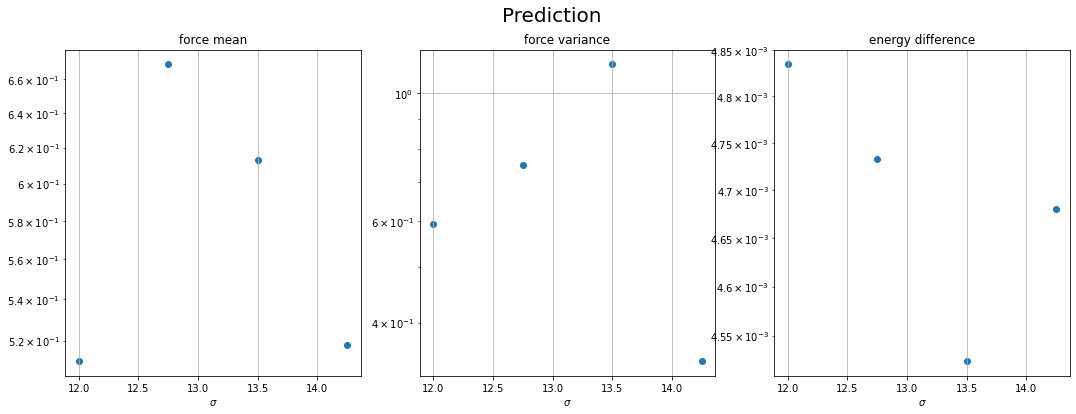

In [137]:
analyze(5, 12, 15, 8, 25)

## Learning on 7 configurations

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   =6.666666666666667
modi      =   10

Minimize values in fit from:
test_data/test_parameters/multi_config/fit_20_(00-100)_m10_s150.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  6.315793|  0.693753|  0.448699|  0.773561|  0.108733|  0.003108|
  0.000010|  1.016727|  0.243714|       nan|       nan|  0.001348|


Minimize values in prediction from:
test_data/test_parameters/multi_config/prediction_20_(00-100)_m10_s150.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  6.842108|  0.704485|  0.473525|  0.764491|  0.122501|  0.002987|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.001529|


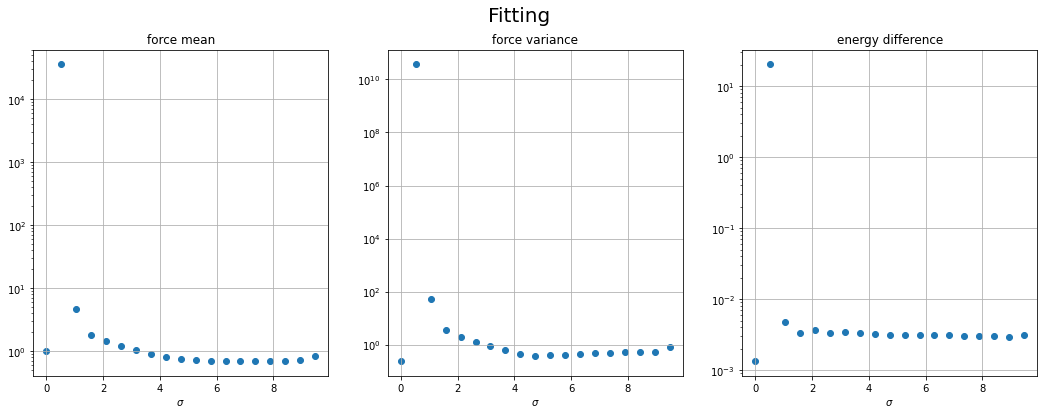

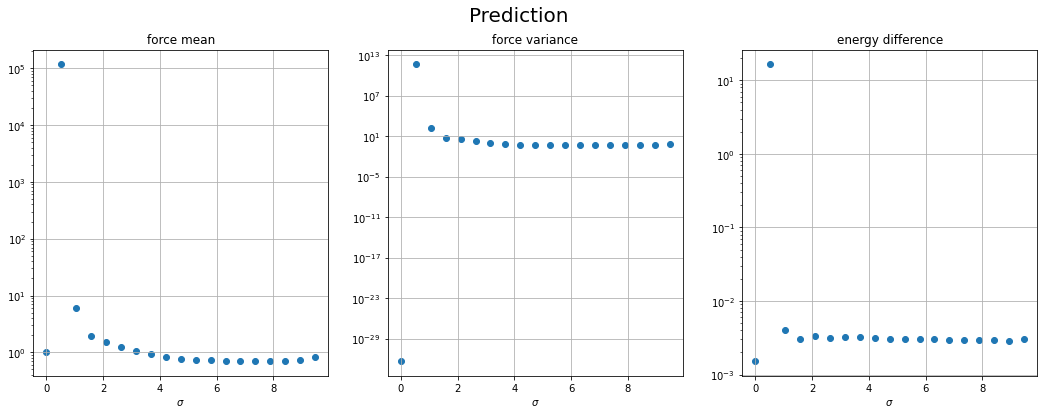

In [134]:
analyze(20, 0, 10, 10, 150)